In [2]:
from statsbombpy import sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, anderson
from scipy.stats import norm
import math
from data_pre import get_df_analysis
import seaborn as sns

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [3]:
competitions = sb.competitions()
fifa_2022 = sb.matches(competition_id=43, season_id=106)

In [4]:
#Grouped events
events_fifa = sb.competition_events(
    country="International",
    division='FIFA World Cup',
    season="2022",
    gender="male"
)

In [5]:
df = get_df_analysis(events_fifa)

In [5]:
df.columns

Index(['pass_outcome', 'match_id', 'id', 'play_pattern', 'player', 'position',
       'tactics', 'possession_team'],
      dtype='object')

Players Analysis

In [6]:
# Calculate risk_percentage for each player
player_df = df.groupby('player')['pass_outcome'].mean().reset_index()
pass_df = df.groupby('player')['pass_outcome'].count().reset_index()
match_df = df.groupby('player')['match_id'].nunique().reset_index()

player_df.rename(columns={'pass_outcome': 'risk_%'}, inplace=True)
pass_df.rename(columns={'pass_outcome': 'Number of Passes'}, inplace=True)
match_df.rename(columns={'match_id': 'Number of Games'}, inplace=True)


player_df['risk_%'] = player_df['risk_%']*100
player_df['Number of Passes'] = pass_df['Number of Passes']
player_df['Number of Games'] = match_df['Number of Games']

#Passes per game
player_df['Passes per Game'] = (player_df['Number of Passes']/player_df['Number of Games']).astype(int)

In [21]:
#Get the 10 players with most passes
player_df.sort_values(by='Passes per Game' , ascending= False).head(10)

,player,risk_%,Number of Passes,Number of Games,Passes per Game
508,Pau Francisco Torres,3.460838,549,1,549
544,Rodrigo Hernández Cascante,1.835343,1907,4,476
82,Aymeric Laporte,2.059308,1214,3,404
510,Pedro González López,2.252907,1376,4,344
403,Marcos Llorente Moreno,3.278689,305,1,305
399,Marcelo Brozović,3.354915,1699,6,283
623,Toby Alderweireld,2.860697,804,3,268
312,Jordi Alba Ramos,3.958530,1061,4,265
303,John Stones,1.523229,1313,5,262
545,Rodrigo Javier De Paul,4.803493,1832,7,261


In [9]:
#Get the 10 players with riskiest percentages
player_df.sort_values(by='risk_%' , ascending= False).head(10)

,player,risk_%,Number of Passes,Number of Games,Passes per Game
20,Ahmed Alaa Eldin Abdelmotaal,25.000000,8,1,8
503,Pablo Sarabia García,23.076923,13,1,13
87,Bailey Wright,21.428571,14,1,14
582,Seyed Hossein Hosseini,20.155039,129,2,64
491,Noa Lang,20.000000,15,1,15
595,Steve Mandanda,18.840580,69,1,69
453,Mohammed Khalil Al Owais,18.595041,242,3,80
250,Hernán Ismael Galíndez,18.435754,179,3,59
362,Keylor Navas Gamboa,17.490494,263,3,87
12,Abdullah Mohammed Madu,17.073171,41,1,41


In [20]:
#Get the 10 players with least risky passes
player_df_pos = player_df[player_df['risk_%']>0]
player_df_pos.sort_values(by='risk_%' , ascending= True).head(10)

,player,risk_%,Number of Passes,Number of Games,Passes per Game
378,Leander Dendoncker,0.542005,369,2,184
69,António João Pereira Albuquerque Tavares Silva,0.574713,174,1,174
353,Kasper Dolberg,0.684932,146,3,48
394,Lukas Klostermann,0.775194,129,2,64
79,Axel Witsel,1.263538,554,3,184
406,Mario Götze,1.333333,75,2,37
401,Marcos Aoás Corrêa,1.346154,1040,5,208
35,Ali Assadalla Thaimn Qambar,1.408451,71,1,71
220,Germán Alejandro Pezzella,1.418440,141,3,47
342,Kalvin Phillips,1.449275,69,2,34


In [11]:
player_df.describe()

,risk_%,Number of Passes,Number of Games,Passes per Game
count,680.000000,680.000000,680.000000,680.000000
mean,5.742523,343.447059,2.935294,105.860294
std,3.439137,313.223424,1.518251,66.054310
min,0.000000,1.000000,1.000000,1.000000
25%,3.542474,107.000000,2.000000,57.000000
50%,5.229020,265.000000,3.000000,94.000000
75%,7.142857,480.000000,4.000000,150.000000
max,25.000000,1907.000000,7.000000,549.000000


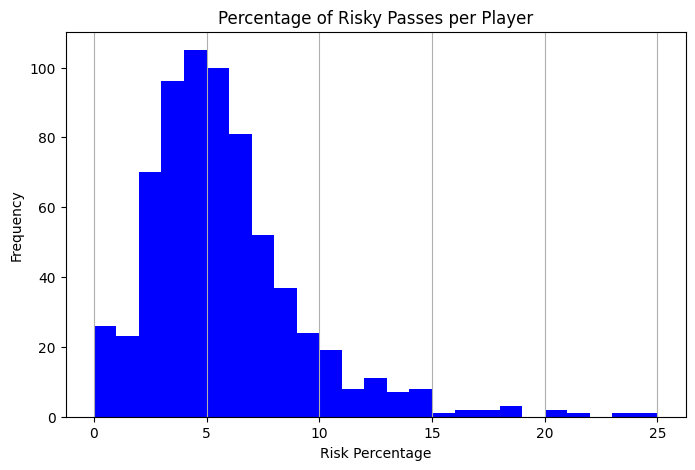

In [12]:
#Histogram for risky passes percentage per player
player_df['risk_%'].hist(bins= 25 ,figsize=(8, 5), color='blue', legend=False)
plt.grid(axis='y')
plt.xlabel('Risk Percentage')
plt.ylabel('Frequency')
plt.title('Percentage of Risky Passes per Player')
#plt.savefig(f'hist_player_risk.png', bbox_inches='tight')
plt.show()

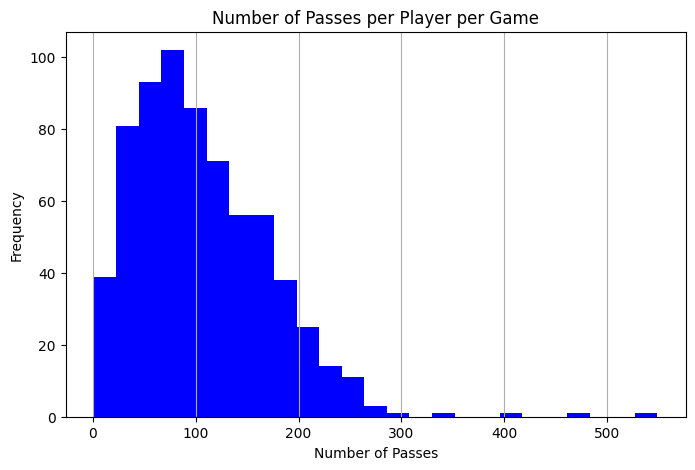

In [13]:
#Histogram for number of passes per player
player_df['Passes per Game'].hist(bins= 25 ,figsize=(8, 5), color='blue', legend=False)
plt.grid(axis='y')
plt.xlabel('Number of Passes')
plt.ylabel('Frequency')
plt.title('Number of Passes per Player per Game')
#plt.savefig(f'hist_pass_player.png', bbox_inches='tight')
plt.show()

Teams Analysis

In [30]:
# Calculate risk_percentage for each player
team_df = df.groupby('possession_team')['pass_outcome'].mean().reset_index()
pass_df = df.groupby('possession_team')['pass_outcome'].count().reset_index()
match_df = df.groupby('possession_team')['match_id'].nunique().reset_index()

team_df.rename(columns={'pass_outcome': 'risk_%'}, inplace=True)
pass_df.rename(columns={'pass_outcome': 'Number of Passes'}, inplace=True)
match_df.rename(columns={'match_id': 'Number of Games'}, inplace=True)


team_df['risk_%'] = team_df['risk_%']*100
team_df['Number of Passes'] = pass_df['Number of Passes']
team_df['Number of Games'] = match_df['Number of Games']

#Passes per game
team_df['Passes per Game'] = (team_df['Number of Passes']/team_df['Number of Games']).astype(int)

In [31]:
team_df.describe()

,risk_%,Number of Passes,Number of Games,Passes per Game
count,32.000000,32.0000,32.000000,32.000000
mean,5.577203,7332.8750,4.000000,1789.906250
std,1.208675,3502.5465,1.344043,422.412836
min,3.118246,3590.0000,3.000000,1196.000000
25%,4.715978,4808.0000,3.000000,1494.000000
50%,5.604453,5891.0000,3.500000,1687.000000
75%,6.250737,9878.2500,4.250000,2079.750000
max,7.954275,16211.0000,7.000000,3239.000000


In [32]:
#Get the riskiest teams
team_df.sort_values(by='risk_%' , ascending= False).head(10)

,possession_team,risk_%,Number of Passes,Number of Games,Passes per Game
22,Saudi Arabia,7.954275,4199,3,1399
14,Iran,7.910864,3590,3,1196
28,Tunisia,7.363269,4699,3,1566
1,Australia,7.285125,5573,4,1393
6,Costa Rica,6.913907,3775,3,1258
31,Wales,6.726457,4683,3,1561
19,Poland,6.688449,5203,4,1300
4,Cameroon,6.438449,4411,3,1470
9,Ecuador,6.188167,5155,3,1718
24,Serbia,6.134011,5119,3,1706


In [33]:
#Get the least risky teams
team_df.sort_values(by='risk_%' , ascending= True).head(10)

,possession_team,risk_%,Number of Passes,Number of Games,Passes per Game
26,Spain,3.118246,12956,4,3239
3,Brazil,3.754236,11214,5,2242
2,Belgium,4.051001,6196,3,2065
10,England,4.116902,11052,5,2210
0,Argentina,4.262538,16211,7,2315
12,Germany,4.358784,6745,3,2248
8,Denmark,4.644057,6546,3,2182
20,Portugal,4.679409,10621,5,2124
11,France,4.728168,13409,7,1915
5,Canada,4.781705,5772,3,1924


In [34]:
#Get the teams with most passes
team_df.sort_values(by='Number of Passes' , ascending= False).head(10)

,possession_team,risk_%,Number of Passes,Number of Games,Passes per Game
0,Argentina,4.262538,16211,7,2315
7,Croatia,4.814553,15557,7,2222
11,France,4.728168,13409,7,1915
26,Spain,3.118246,12956,4,3239
3,Brazil,3.754236,11214,5,2242
10,England,4.116902,11052,5,2210
20,Portugal,4.679409,10621,5,2124
17,Morocco,5.647674,9951,7,1421
18,Netherlands,4.830526,9854,5,1970
29,United States,5.206601,7817,4,1954


In [38]:
#Get the teams with most passes
team_df.sort_values(by='Passes per Game' , ascending= False).head(10)

,possession_team,risk_%,Number of Passes,Number of Games,Passes per Game
26,Spain,3.118246,12956,4,3239
0,Argentina,4.262538,16211,7,2315
12,Germany,4.358784,6745,3,2248
3,Brazil,3.754236,11214,5,2242
7,Croatia,4.814553,15557,7,2222
10,England,4.116902,11052,5,2210
8,Denmark,4.644057,6546,3,2182
20,Portugal,4.679409,10621,5,2124
2,Belgium,4.051001,6196,3,2065
18,Netherlands,4.830526,9854,5,1970


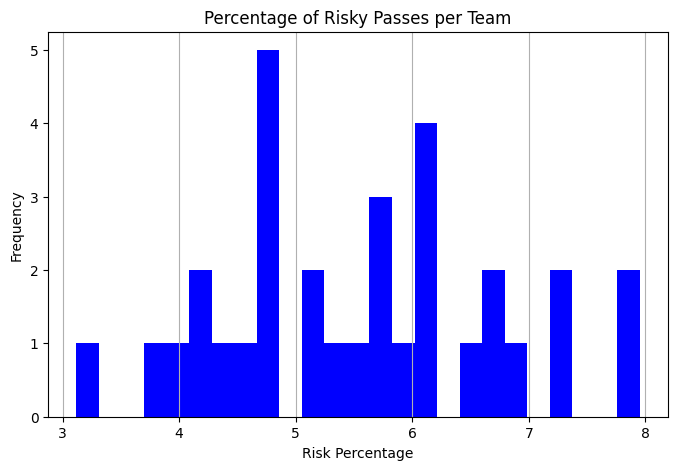

In [36]:
#Histogram for risky passes percentage per team
team_df['risk_%'].hist(bins= 25 ,figsize=(8, 5), color='blue', legend=False)
plt.grid(axis='y')
plt.xlabel('Risk Percentage')
plt.ylabel('Frequency')
plt.title('Percentage of Risky Passes per Team')
plt.savefig(f'hist_team_risk.png', bbox_inches='tight')
plt.show()

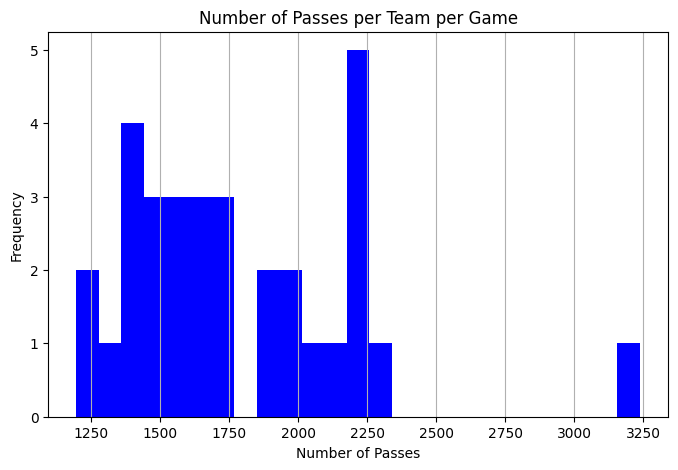

In [37]:
#Histogram for number of passes per team
team_df['Passes per Game'].hist(bins= 25 ,figsize=(8, 5), color='blue', legend=False)
plt.grid(axis='y')
plt.xlabel('Number of Passes')
plt.ylabel('Frequency')
plt.title('Number of Passes per Team per Game')
plt.savefig(f'hist_pass_team.png', bbox_inches='tight')
plt.show()

Tactics Analysis

In [47]:
# Calculate risk_percentage for each formation
tactics_df = df.groupby('tactics')['pass_outcome'].mean().reset_index()
pass_df = df.groupby('tactics')['pass_outcome'].count().reset_index()
match_df = df.groupby('tactics')['match_id'].nunique().reset_index()

tactics_df.rename(columns={'pass_outcome': 'risk_%'}, inplace=True)
pass_df.rename(columns={'pass_outcome': 'Number of Passes'}, inplace=True)
match_df.rename(columns={'match_id': 'Number of Games'}, inplace=True)


tactics_df['risk_%'] = tactics_df['risk_%']*100
tactics_df['Number of Passes'] = pass_df['Number of Passes']
tactics_df['Number of Games'] = match_df['Number of Games']

#Passes per formation
tactics_df['Passes per Game'] = (tactics_df['Number of Passes']/tactics_df['Number of Games']).astype(int)

In [50]:
tactics_df.sort_values(by='Number of Games' , ascending= False)

,tactics,risk_%,Number of Passes,Number of Games,Passes per Game
0,0,5.19419,234281,64,3660
9,4231,0.00000,88,46,1
3,433,0.00000,87,41,2
4,442,0.00000,53,34,1
1,343,0.00000,41,20,2
2,352,0.00000,34,20,1
6,3421,0.00000,20,10,2
10,4411,0.00000,19,10,1
5,3412,0.00000,14,8,1
8,4141,0.00000,13,8,1
